<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
%load_ext autoreload
%autoreload 2

import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.core.display import display,HTML

import math

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Build a decision diagram

## fast build with string

In [3]:
gum.fastID("A->*B->$C<-D<-*E->*G->H->*I<-D")

(gum::InfluenceDiagram<double>@000001FE56CDCD10) Influence Diagram{
  chance: 3,
  utility: 1,
  decision: 4,
  arcs: 8,
  domainSize: 128
}

## bifxml format file

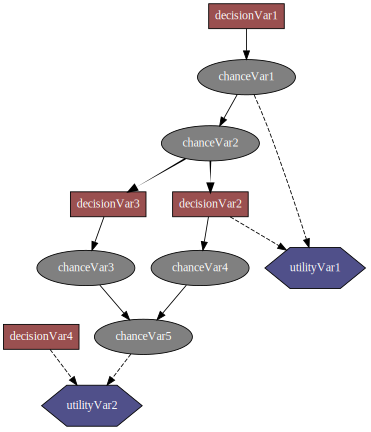

In [4]:
diag=gum.loadID(os.path.join("res","diag.bifxml"))
gnb.showInfluenceDiagram(diag)

In [5]:
diag

(gum::InfluenceDiagram<double>@000001FE5053CB20) Influence Diagram{
  chance: 5,
  utility: 2,
  decision: 4,
  arcs: 12,
  domainSize: 512
}

## the hard way :-)

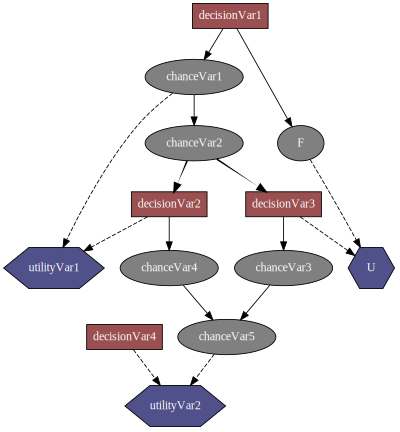

In [6]:
F=diag.addChanceNode(gum.LabelizedVariable("F","F",2))
diag.addArc(diag.idFromName("decisionVar1"),F)

U=diag.addUtilityNode(gum.LabelizedVariable("U","U",1))
diag.addArc(diag.idFromName("decisionVar3"),U)
diag.addArc(diag.idFromName("F"),U)
gnb.showInfluenceDiagram(diag)

In [7]:
diag.cpt(F)[{'decisionVar1':0}]=[0.9,0.1]
diag.cpt(F)[{'decisionVar1':1}]=[0.3,0.7]

diag.utility(U)[{'F':0,'decisionVar3':0}]=2
diag.utility(U)[{'F':0,'decisionVar3':1}]=4
diag.utility(U)[{'F':1}]=[[0],[5]]

# Optimization in an influence diagram (actually LIMID)

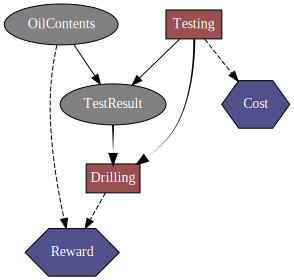

In [8]:
oil=gum.loadID(os.path.join("res","OilWildcatter.bifxml"))
gnb.showInfluenceDiagram(oil)

In [9]:
# a function to show results on decision nodes T and D
def show_decisions(ie):
    gnb.sideBySide(ie.optimalDecision("Testing"),
                   ie.optimalDecision("Drilling"),
                   f"{ie.MEU()['mean']:5.3f} (stdev : {math.sqrt(ie.MEU()['variance']):5.3f})",
                   captions=["Strategy for T","Strategy for D","MEU"])
    gnb.sideBySide(ie.posterior("Testing"),ie.posteriorUtility("Testing"),ie.posterior("Drilling"),ie.posteriorUtility("Drilling"),
                  captions=["Final decision for Testing","Final reward for Testing","Final decision for Drilling","Final reward for Drilling"])

In [10]:
ie=gum.ShaferShenoyIDInference(oil) 

display(HTML("<h2>Inference in the LIMID optimizing the decisions nodes</h2>"))
ie.makeInference()
show_decisions(ie)

** pyAgrum.InfluenceDiagramInference is deprecated in pyAgrum>0.18.2.
** A pyAgrum.ShaferShenoyLIMIDInference has been created.


In [11]:
display(HTML("<h2>Inference with evidence in the LIMID optimizing the decisions nodes</h2>"))
ie.eraseAllEvidence()
ie.setEvidence({"TestResult":"diffuse"})
ie.makeInference()
show_decisions(ie)

In [12]:
display(HTML(f"<b>Labeld for variable oil contents</b> : {oil.variableFromName('OilContents').labels()}"))

for v in oil.variableFromName('OilContents').labels():
    ie.eraseAllEvidence()
    ie.setEvidence({"OilContents":v})
    ie.makeInference()
    display(HTML(f"<h3>Optimizations with hard evidence <em>{v}</em> on 'OilContents'</h3>"))
    show_decisions(ie)
                   
    
softev=[0.7,0.5,0.9]
display(HTML(f"<h3>Optimization with soft evidence <tt>{softev}</tt> on 'Oil'</h3>"))
ie.eraseAllEvidence()
ie.setEvidence({"OilContents":softev})
ie.makeInference()
show_decisions(ie)

In [13]:
display(HTML("<H2>forcing a decision : T=<tt>Yes</tt></H2>"))
ie.eraseAllEvidence()
ie.setEvidence({"Testing":"Yes"})
ie.makeInference()
show_decisions(ie)

In [14]:
display(HTML("<H2>forcing a decision : D=<tt>Yes</tt></H2>"))
ie.eraseAllEvidence()
ie.setEvidence({"Drilling":"Yes"})
ie.makeInference()
show_decisions(ie)

# Graphical inference

In [15]:
gnb.sideBySide(oil,gnb.getInference(oil,evs={'TestResult':'closed'}),gnb.getInference(oil,evs={'TestResult':'open'}),gnb.getInference(oil,evs={'TestResult':'diffuse'}))
gnb.sideBySide(oil,gnb.getInference(oil,evs={'OilContents':'Dry'}),gnb.getInference(oil,evs={'OilContents':'Wet'}),gnb.getInference(oil,evs={'OilContents':'Soaking'}))

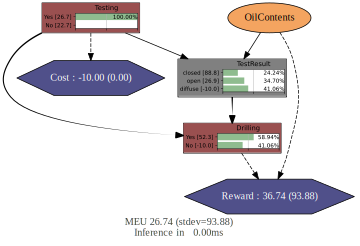

In [16]:
gnb.showInference(oil,evs={'OilContents':[0.7,0.5,0.8]},targets={'Testing','Drilling','TestResult'})

In [17]:
ie=gum.ShaferShenoyLIMIDInference(oil)
ie.makeInference()

ie.optimalDecision("Drilling")

(gum::Potential<double>@000001FE50981950) 
      ||  Drilling         |
TestRe||Yes      |No       |
------||---------|---------|
closed|| 1.0000  | 0.0000  |
open  || 1.0000  | 0.0000  |
diffus|| 1.0000  | 0.0000  |

In [18]:
ie.posterior("Reward")

(gum::Potential<double>@000001FE50B57CE0) 
      ||  Drilling         |
OilCon||Yes      |No       |
------||---------|---------|
Dry   || 0.2000  | 0.3000  |
Wet   || 0.2100  | 0.0900  |
Soakin|| 0.1800  | 0.0200  |

In [19]:
oil.utility("Reward")

(gum::Potential<double>@000001FE505F7B50) 
             ||  Reward |
OilCon|Drilli||0        |
------|------||---------|
Dry   |Yes   || -70.0000|
Wet   |Yes   || 50.0000 |
Soakin|Yes   || 200.0000|
Dry   |No    || 0.0000  |
Wet   |No    || 0.0000  |
Soakin|No    || 0.0000  |

In [20]:
diag=gum.InfluenceDiagram()
F=diag.addChanceNode(gum.LabelizedVariable("Stock","Prob Stock",2))
D=diag.addDecisionNode(gum.LabelizedVariable("Decision","Invest",2))
U=diag.addUtilityNode(gum.LabelizedVariable("Utility","Expected Utility",1))
#Unir nodos
diag.addArc(D,U)
diag.addArc(F,U)
diag

diag.cpt(F)[{'Decision':0}]=[1,0]
diag.cpt(F)[{'Decision':1}]=[0.6,0.4]

diag.utility(U)[{'Stock':0,'Decision':1}]=1100
diag.utility(U)[{'Stock':1,'Decision':1}]=900
diag.utility(U)[{'Stock':0,'Decision':0}]=1000
diag.utility(U)[{'Stock':1,'Decision':0}]=1000

diag

(gum::InfluenceDiagram<double>@000001FE503F8D90) Influence Diagram{
  chance: 1,
  utility: 1,
  decision: 1,
  arcs: 2,
  domainSize: 4
}

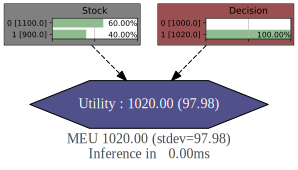

In [21]:
gnb.showInference(diag)

In [22]:
model = gum.InfluenceDiagram()
model.addDecisionNode(gum.LabelizedVariable('DoTest','which tests to run',['None','First','Both']))
model.addDecisionNode(gum.LabelizedVariable('Buy'   ,'Buy the car'       ,['No','Yes']))
model.addChanceNode(gum.LabelizedVariable('Condition','Car Condition',['Good','Lemon']) )
model.addChanceNode(gum.LabelizedVariable('FirstTest','Test Results',['NotDone','Positive','Negative']))
model.addChanceNode(gum.LabelizedVariable('SecondTest','Test Results',['NotDone','Positive','Negative']))
model.addUtilityNode(gum.LabelizedVariable('U','test satisfaction',1))
model.addUtilityNode(gum.LabelizedVariable('V','car satisfaction',1))
model.addArc('Condition','V')
model.addArc('Buy','V')
model.addArc('DoTest','U')
model.addArc('FirstTest','Buy')
model.addArc('SecondTest','Buy')
model.addArc('Condition','FirstTest')
model.addArc('DoTest','FirstTest')
model.addArc('FirstTest','SecondTest')
model.addArc('Condition','SecondTest')
model.addArc('DoTest','SecondTest')
model.utility('U')[{'DoTest':'None'}]=0
model.utility('U')[{'DoTest':'First'}]=-9
model.utility('U')[{'DoTest':'Both'}]=-13
model.utility('V')[{'Condition':'Good', 'Buy':'Yes'} ]=60
model.utility('V')[{'Condition':'Good', 'Buy':'No'} ]=0
model.utility('V')[{'Condition':'Lemon','Buy':'Yes'}]=-100
model.utility('V')[{'Condition':'Lemon','Buy':'No'}]=0
model.cpt('Condition')[:]=[0.8, 0.2]
model.cpt('Condition')
model.cpt('FirstTest')[{'Condition':'Good'}]=[[1,0,0], [0,.90,.10], [0,.90,.10]]
model.cpt('FirstTest')[{'Condition':'Lemon'}]=[[1,0,0], [0,.40,.60], [0,.40,.60]]
model.cpt('SecondTest')[{'DoTest':'None'}]=[[[1,0,0],[1,0,0],[1,0,0]],
[[1,0,0],[1,0,0],[1,0,0]]]
model.cpt('SecondTest')[{'DoTest':'First'}]=[[[1,0,0],[1,0,0],[1,0,0]],
[[1,0,0],[1,0,0],[1,0,0]]]
model.cpt('SecondTest')[{'DoTest':'Both', 'Condition':'Good', 'FirstTest':'Positive'}]=[0, 8/9, 1/9]
model.cpt('SecondTest')[{'DoTest':'Both', 'Condition':'Good', 'FirstTest':'Negative'}]=[0,1,0]
model.cpt('SecondTest')[{'DoTest':'Both', 'Condition':'Lemon', 'FirstTest':'Positive'}]=[0,1/3,2/3]
model.cpt('SecondTest')[{'DoTest':'Both', 'Condition':'Lemon', 'FirstTest':'Negative'}]=[0,4/9, 5/9]

In [23]:
model

(gum::InfluenceDiagram<double>@000001FE503F9AB0) Influence Diagram{
  chance: 3,
  utility: 2,
  decision: 2,
  arcs: 10,
  domainSize: 108
}

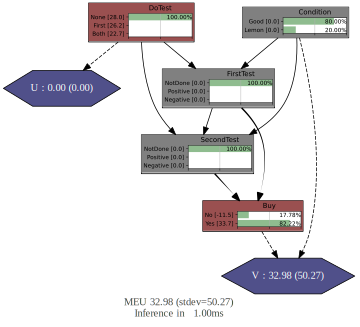

In [24]:
gnb.showInference(model)

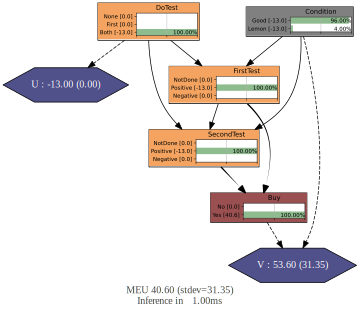

In [25]:
gnb.showInference(model, evs={"DoTest":"Both", "FirstTest":"Positive", "SecondTest":"Positive"})

In [26]:
ie=gum.ShaferShenoyLIMIDInference(model)
ie.reducedLIMID()

(gum::InfluenceDiagram<double>@000001FE503FA7D0) Influence Diagram{
  chance: 3,
  utility: 2,
  decision: 2,
  arcs: 10,
  domainSize: 108
}

In [27]:
gnb.sideBySide(gnb.getInference(model, evs={"DoTest":"None", "FirstTest":"Positive", "SecondTest":"Positive"})

SyntaxError: unexpected EOF while parsing (<ipython-input-27-4fa67e8ec022>, line 1)

In [ ]:
!ls res

In [ ]:
diag=gum.loadID(os.path.join("res","ClemenFigure04.12.bifxml"))
gnb.showInfluenceDiagram(diag)

In [ ]:
gnb.showInference(diag)

In [41]:
infdiag=gum.fastID("Chance->*Decision1->$Utility<-*Decision2<-Chance")
infdiag

(gum::InfluenceDiagram<double>@000001FE50BE8D20) Influence Diagram{
  chance: 1,
  utility: 1,
  decision: 2,
  arcs: 4,
  domainSize: 8
}

In [42]:
ie=gum.ShaferShenoyLIMIDInference(infdiag)
ie.makeInference()

FatalError: [pyAgrum] Fatal error: This LIMID/Influence Diagram is not solvable.

In [44]:
ie.addNoForgettingAssumption(["Decision1","Decision2"])
gnb.sideBySide(ie.reducedLIMID(),gnb.getInference(infdiag,ie))

"G <!-- Chance --> Chance Chance <!-- Decision1 --> Decision1 Decision1 <!-- Decision2 --> Decision2 Decision2 <!-- Decision1->Decision2 --> Decision1->Decision2 <polygon fill=""black"" stroke=""transparent"" stroke-width=""2"" stroke-dasharray=""1,5"" points=""127.89,-153.81 127.2,-152.41 126.48,-150.98 125.74,-149.5 124.99,-147.98 124.22,-146.43 123.43,-144.86 122.63,-143.25 121.82,-141.63 121,-139.98 120.18,-138.32 119.35,-136.65 118.51,-134.98 117.67,-133.3 116.84,-131.61 116,-129.94 115.17,-128.26 114.34,-126.6 113.52,-124.96 112.71,-123.33 111.91,-121.73 111.91,-121.73 112.62,-123.37 113.34,-125.04 114.06,-126.73 114.8,-128.44 115.54,-130.15 116.28,-131.87 117.02,-133.6 117.76,-135.32 118.5,-137.05 119.24,-138.76 119.97,-140.46 120.7,-142.15 121.41,-143.82 122.12,-145.46 122.82,-147.08 123.5,-148.67 124.17,-150.23 124.82,-151.74 125.46,-153.22 126.08,-154.65 127.89,-153.81""/> <!-- Utility --> Utility Utility <!-- Decision1->Utility --> Decision1->Utility <!-- Decision2->Utility --> Decision2->Utility"
